In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
PATH = 'C:/Users/alimc/OneDrive/Рабочий стол/GeekBrains/HWStatistic/Project_bank/BankChurners.csv'

Менеджер банка обеспокоен тем, что все больше и больше клиентов отказываются от обслуживания кредитных карт. Они были бы очень признательны, если бы кто-то мог предсказать для них, кого уволят, чтобы они могли заранее обратиться к клиенту, чтобы предоставить им более качественные услуги и изменить решения клиентов в противоположном направлении.

Теперь этот набор данных состоит из 10 000 клиентов, указывающих их возраст, зарплату, семейное положение, лимит кредитной карты, категорию кредитной карты и т. д. Существует около 18 функций.

У нас только 16,07% клиентов ушли. Таким образом, немного сложно обучить нашу модель предсказанию оттока клиентов.

In [5]:
df = pd.read_csv(PATH)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### Здесь видно, что:
##### 1) нет нулевых значений
#####  2) последнии названия столбцов слишком большие, что выглядит неудобным для анализа
#####  3) нужно использовать многофакторый анализ, но скорее всего для упрощения работы используем двухфакторный дисперсионный анализ, выбрав на мой взгляд самые коррелирующие факторы.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

#### В данном проекте, нужно найти факторы, которые влияют на решение клиента отказаться от обслуживания кредитной картой
#### 1) гипотеза H0 = {Фактор не влияет на решение клиента отказать от обслуживания кредитной картой (Нет статистически значимых различий)}
#### 2) гипотеза H1 =  {Фактор влияет на решение клиента отказать от обслуживания кредитной картой (Есть статистически значимые различия)}

In [8]:
df=df[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
          'Dependent_count', 'Education_Level', 'Marital_Status',
          'Income_Category', 'Card_Category', 'Months_on_book',
          'Total_Relationship_Count', 'Months_Inactive_12_mon',
          'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
          'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
          'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
          
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:
#Заметно, что есть небольшие выбросы в правую сторону:
#Возраст, чуть более взрослые люди оформляют кредитную карту чаще
#Dependent_count (Количество недееспособных членов семьи), чуть чаще люди с большим количеством недееспособных
#родственников берут кредитные карты
#Кредитный лимит, сильный выброс в право, нужно изучить график
#Кредитная линия, сильный выброс в право, нужно изучить график
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [14]:
df.describe(include='O').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [16]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

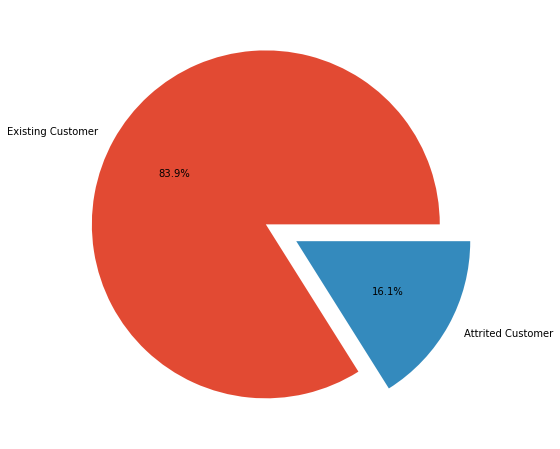

In [17]:
inter=df['Attrition_Flag'].value_counts()
plt.pie(inter,labels=inter.index,autopct='%0.1f%%',explode=[0.0,0.2]);

In [27]:
def plot_num(var):
    
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=var,hue='Attrition_Flag',kde=True);
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Attrition_Flag',y=var,data=df);

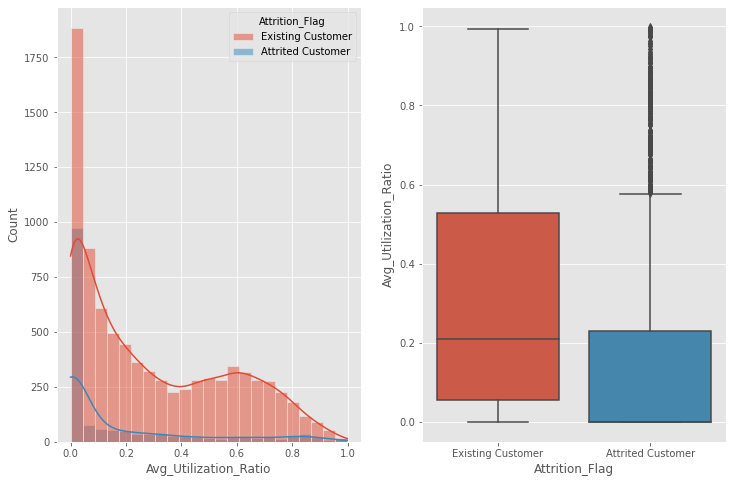

In [28]:
#В принципе логично, что те, кто редко пользуется кредиткой, чаще всего отказываются от ее обслуживания
plot_num('Avg_Utilization_Ratio')

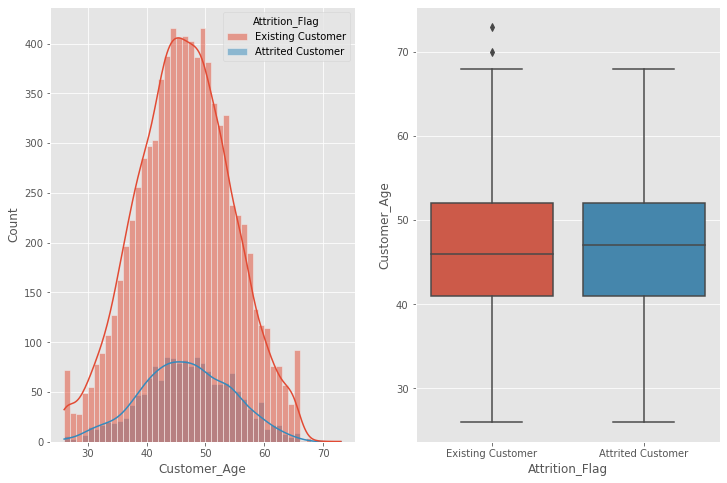

In [29]:
#А с возрастом все окей, распределения следуют нормальному закоку и в принципе похожи но:
#Важное замечание, распределение возраста отказывающихся от карт по горизонтали растянуто, и больше влевую сторону
#более молодые реже пользуются кредитками и впоследствие отказываются
plot_num('Customer_Age')

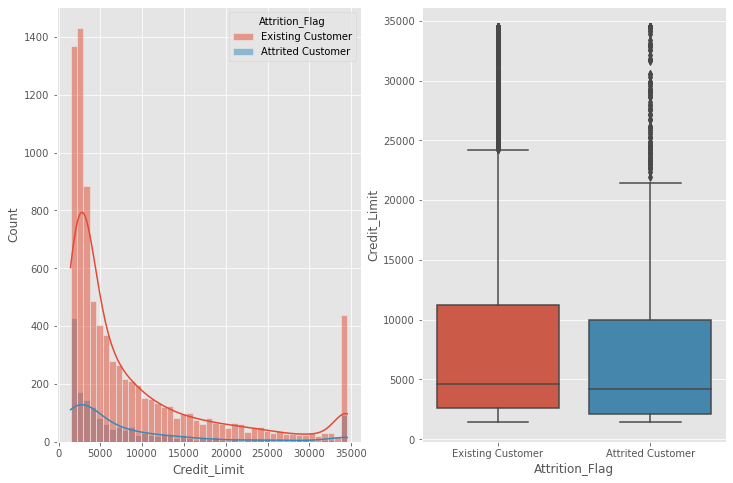

In [30]:
plot_num('Credit_Limit')

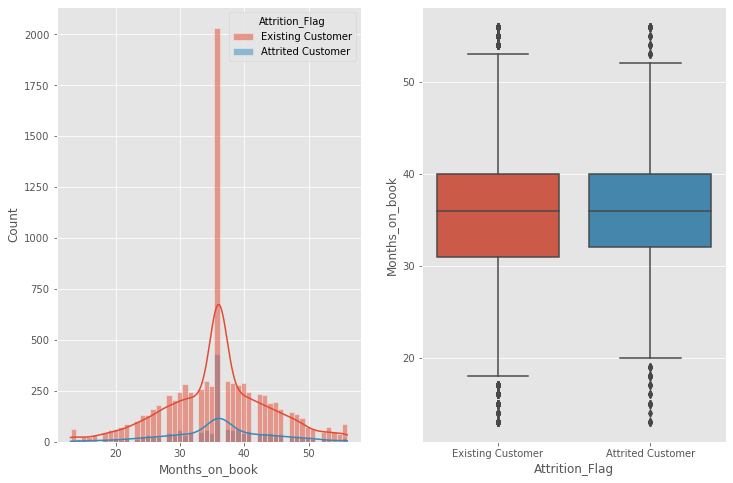

In [31]:
plot_num('Months_on_book')

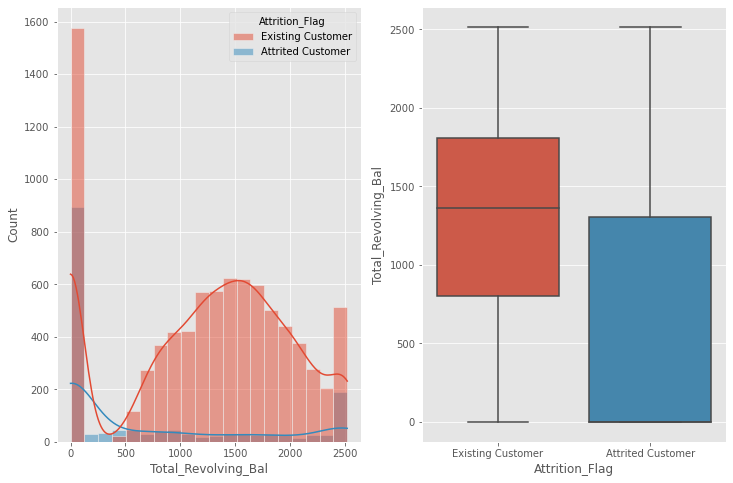

In [32]:
#Тут исследуется суммарный оборот на карте за последние 12 месяцев, странно, что те, кто потратили 2500 за 12 месяцев
#отказались от карты, тут то и нужно понять почему.
plot_num('Total_Revolving_Bal')

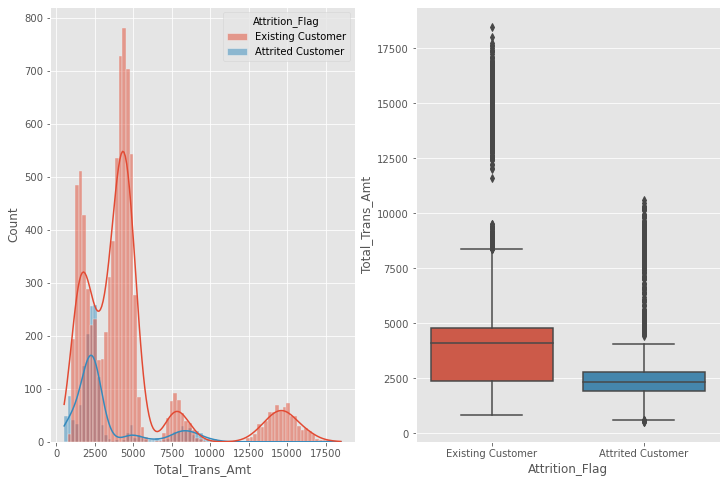

In [33]:
plot_num('Total_Trans_Amt')

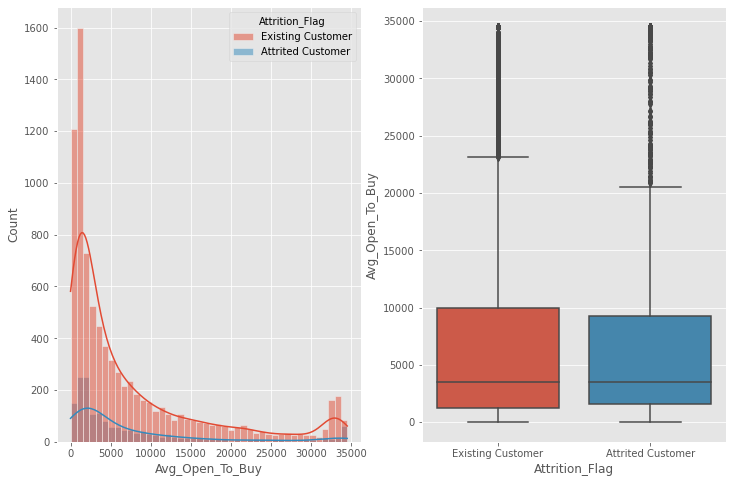

In [35]:
plot_num('Avg_Open_To_Buy')

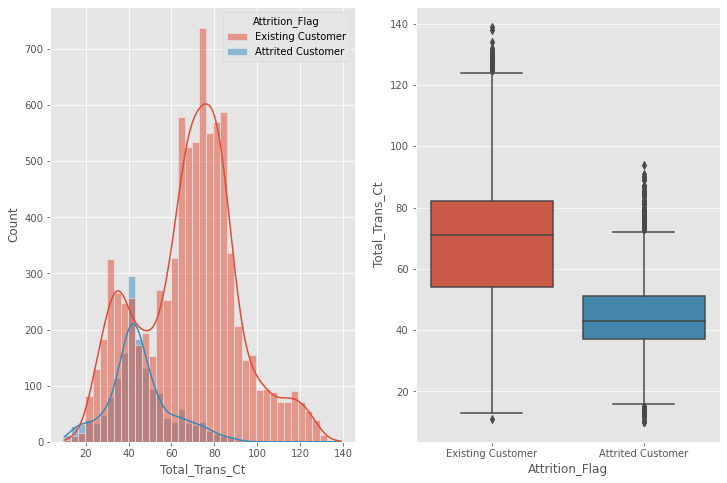

In [36]:
plot_num('Total_Trans_Ct')

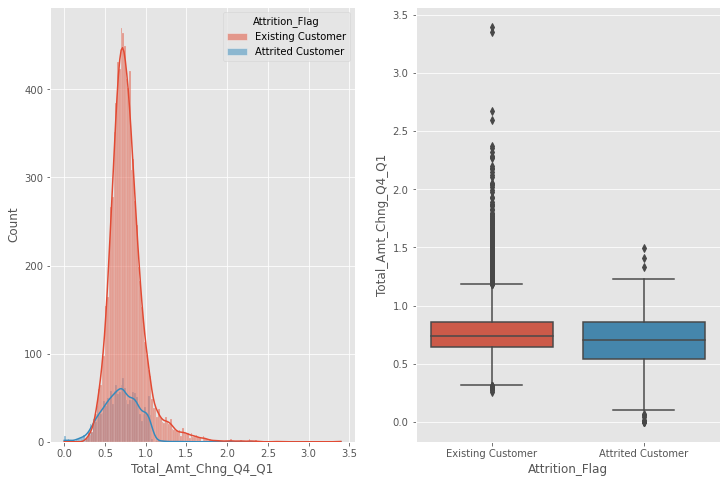

In [37]:
plot_num('Total_Amt_Chng_Q4_Q1')

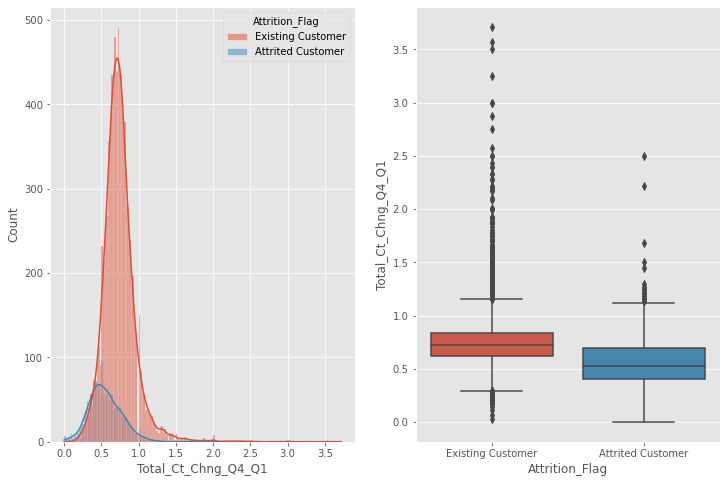

In [38]:
plot_num('Total_Ct_Chng_Q4_Q1')

Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal, Total_Ct_Chng_Q4_Q1 и Avg_Utilization_Ratio, по-видимому, влияют на определение того, покидает ли клиент обслуживание или нет.

В то время как переменные Age и month_on_book кажутся несущественными для принятия решения о том, покидает ли клиент обслуживание или нет.

#### Проведем для начала однофакторный дисперсионный анализ
#### в качестве фактора возьмем Avg_Utilization_Ratio(частоту пользования картой)

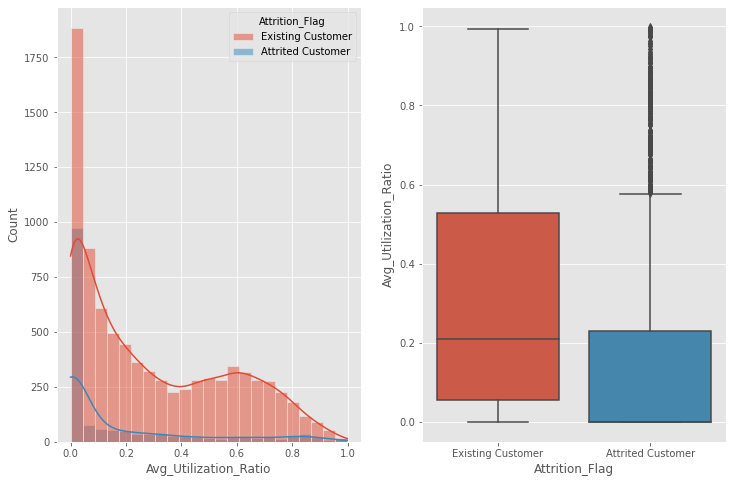

In [42]:
#Еще раз посмотрим на график
plot_num('Avg_Utilization_Ratio')

In [49]:
#Разделим данные на два датафрейма Existing Customer и Attrited Customer
Existing_Customer = df.loc[df['Attrition_Flag'] == 'Existing Customer', ['Attrition_Flag', 'Avg_Utilization_Ratio'] ]
Attrited_Customer = df.loc[df['Attrition_Flag'] == 'Attrited Customer', ['Attrition_Flag', 'Avg_Utilization_Ratio'] ]

In [51]:
Attrited_Customer.count()

Attrition_Flag           1627
Avg_Utilization_Ratio    1627
dtype: int64

In [52]:
Existing_Customer.count()

Attrition_Flag           8500
Avg_Utilization_Ratio    8500
dtype: int64

In [ ]:
#Используем критерий Фишера, условия использования:
#1) Значения групп следуют нормальному расспределению (У нас вообще они не особо следуют нормальному распределнию,
# но в любом случае попробуем)
#2)Однородность дисперсий
#3)Независимость

In [54]:
#Проверим 2-е условие:
Attrited_Customer['Avg_Utilization_Ratio'].std()

0.2644576219162126

In [55]:
Existing_Customer['Avg_Utilization_Ratio'].std()

0.27256781304868866

In [57]:
#Уровень значимости возьмем alpha = 0.05
#Кол. степеней свободы у факторной дисперсии = 1
#Кол. степеней свободы у остаточной дисперсии = 10127 - 2 = 10125
from scipy import stats 
stats.f.ppf(0.95, 1, 10125) #Критическое значение критерия Фишера для наших степеней свободы

3.8423774163432385

In [58]:
stats.f_oneway(Attrited_Customer['Avg_Utilization_Ratio'], Existing_Customer['Avg_Utilization_Ratio'])

F_onewayResult(statistic=332.87679529857104, pvalue=3.35768932820783e-73)

### Использую логистическую регерессию, которая больше подойдет для нашей выборки

#### Используем матричный метод, для поиска коэфф.

In [89]:
col=['Avg_Utilization_Ratio','Total_Revolving_Bal','Total_Trans_Amt',
     'Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']

In [90]:
X=df[col]
X

,Avg_Utilization_Ratio,Total_Revolving_Bal,Total_Trans_Amt,Avg_Open_To_Buy,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1
0,0.061,777,1144,11914.0,42,1.335,1.625
1,0.105,864,1291,7392.0,33,1.541,3.714
2,0.000,0,1887,3418.0,20,2.594,2.333
3,0.760,2517,1171,796.0,20,1.405,2.333
4,0.000,0,816,4716.0,28,2.175,2.500
...,...,...,...,...,...,...,...
10122,0.462,1851,15476,2152.0,117,0.703,0.857
10123,0.511,2186,8764,2091.0,69,0.804,0.683
10124,0.000,0,10291,5409.0,60,0.819,0.818
10125,0.000,0,8395,5281.0,62,0.535,0.722


In [91]:
y = pd.DataFrame(df['Attrition_Flag'])
y.loc[y['Attrition_Flag'] == 'Existing Customer', 'Attrition_Flag']  = 1
y.loc[y['Attrition_Flag'] == 'Attrited Customer', 'Attrition_Flag']  = 0
y = np.array(y)
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=object)

In [92]:
X = np.hstack([np.ones((10127, 1)), X])

array([1.000e+00, 1.050e-01, 8.640e+02, 1.291e+03, 7.392e+03, 3.300e+01,
       1.541e+00, 3.714e+00])

In [93]:
b = np.dot(np.linalg.inv(np.dot(X.T, X)),X.T@y)
b

array([[-0.06035154640098073],
       [-0.003953072845337802],
       [0.00010527280946305784],
       [-4.342761902325688e-05],
       [1.2767476326293056e-06],
       [0.01026808040718034],
       [0.08102040572678515],
       [0.32650431562175086]], dtype=object)

In [100]:
#используем sigmoid фунцию
def Z(x1, x2, x3, x4, x5, x6, x7):
    return( (-0.06035154640098073 + (-0.003953072845337802)*x1 + 0.00010527280946305784*x2 + 
     (-4.342761902325688e-05)*x3 + 1.2767476326293056e-06*x4 + 0.01026808040718034*x5 + 
     0.08102040572678515*x6 + 0.32650431562175086*x7) )
    
def sigmoid(Z):
    return(1/(1 + np.exp(Z)))

col=['Avg_Utilization_Ratio','Total_Revolving_Bal','Total_Trans_Amt',
     'Avg_Open_To_Buy','Total_Trans_Ct','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1','Attrition_Flag']
predict = df[col]
predict['sigmoid'] = sigmoid(Z(predict['Avg_Utilization_Ratio'], predict['Total_Revolving_Bal'], 
                               predict['Total_Trans_Amt'], predict['Avg_Open_To_Buy'], 
                               predict['Total_Trans_Ct'], predict['Total_Amt_Chng_Q4_Q1'],
                               predict['Total_Ct_Chng_Q4_Q1']))
predict

C:\Users\alimc\AppData\Local\Temp/ipykernel_1456/1719360232.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict['sigmoid'] = sigmoid(Z(predict['Avg_Utilization_Ratio'], predict['Total_Revolving_Bal'],


,Avg_Utilization_Ratio,Total_Revolving_Bal,Total_Trans_Amt,Avg_Open_To_Buy,Total_Trans_Ct,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Attrition_Flag,sigmoid
0,0.061,777,1144,11914.0,42,1.335,1.625,Existing Customer,0.257936
1,0.105,864,1291,7392.0,33,1.541,3.714,Existing Customer,0.159776
2,0.000,0,1887,3418.0,20,2.594,2.333,Existing Customer,0.261280
3,0.760,2517,1171,796.0,20,1.405,2.333,Existing Customer,0.225708
4,0.000,0,816,4716.0,28,2.175,2.500,Existing Customer,0.233220
...,...,...,...,...,...,...,...,...,...
10122,0.462,1851,15476,2152.0,117,0.703,0.857,Existing Customer,0.268650
10123,0.511,2186,8764,2091.0,69,0.804,0.683,Attrited Customer,0.312928
10124,0.000,0,10291,5409.0,60,0.819,0.818,Attrited Customer,0.389560
10125,0.000,0,8395,5281.0,62,0.535,0.722,Attrited Customer,0.378124


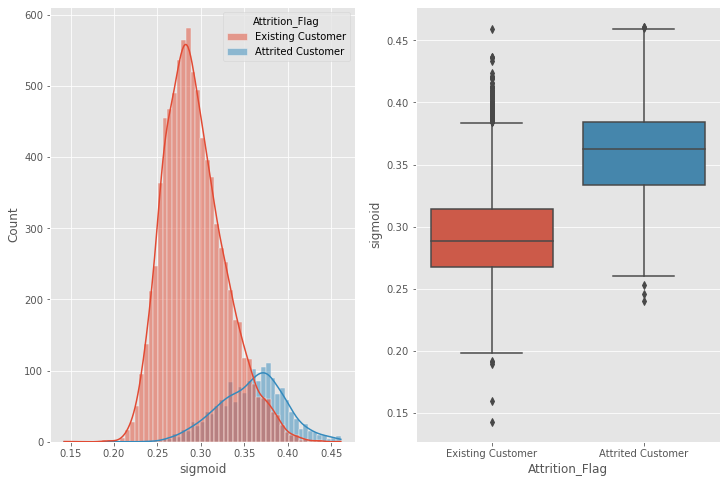

In [102]:
plot_num(predict['sigmoid'])

### Вывод: С помощью логистической регрессии нам удалось получить явные отличия между двумя группами людей, используя при это только самые важные факторы, с помощью матричного метода я нашел коэф. наших факторов, далее преобразовал все велечины в <1 с помощью sigmoid функции, и по графику видно, что те кто отказываются от обслуживания кредитных имеют sigmoid > 0,35, таким образом я решил проблему банка, и можно сразу же явно определять клиентов, которые с большей долей вероятности откажутся от обслуживания. Boxplot графики также выделяют явные отличия.